Подключаем все библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.simplefilter('ignore')

Открываем наши данные

In [2]:
df = pd.read_csv("main.csv")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,sale,flat,5.0,7.0,1.0,34.6,...,-1.0,-1,18 м²,8 м²,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская,NaN
1,ЛэндЛ,real_estate_agent,https://www.cian.ru/sale/flat/302263383/,Москва,sale,flat,14.0,45.0,1.0,41.3,...,-1.0,Без отделки,20 м²,11 м²,7.964559e+10,Нижегородский,Перовское шоссе,NaN,Нижегородская,Level Нижегородская
2,Stenoy,developer,https://www.cian.ru/sale/flat/300878920/,Москва,sale,flat,10.0,12.0,1.0,34.4,...,-1.0,"Без отделки, черновая, чистовая","11,8 м²","11,7 м²",7.499716e+10,Преображенское,Электрозаводская,60,Преображенская площадь,ARTEL
3,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,sale,flat,4.0,33.0,1.0,42.9,...,-1.0,-1,"22,9 м²",15 м²,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская,iLove
4,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,sale,flat,1.0,16.0,1.0,37.7,...,-1.0,-1,-1,-1,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская,NaN


Необходимо почистить данные от пустых значений, заменим их на NaN

In [3]:
df = df.replace(-1,np.nan)
df = df.replace("-1",np.nan)
df = df.replace(-1.0,np.nan)
df = df.replace("-1.0",np.nan)
del df['accommodation_type'] # т.к. в данном столбце мы имеем только данные о том, что совершается покупка квартиры
del df['deal_type'] # на интересует только покупка, поэтому этот столбец тоже не имеет значения
del df['residential_complex'] # название жилового комплекса, отсутсвуте в большинстве случаев, избавляемся
del df['heating_type'] # тип отопления, который не имеет данных
del df['object_type'] # тип объекта, также в большинстве случаев также не имеет данных
# Также необходимо в сохранённом файле изменить ��� на 0, для избежания ошибок

Открываем новые данные

In [30]:
df = pd.read_csv("main.csv")
info = pd.read_csv('info.csv')
info_sorted = info.sort_values(by='price_for_meter', ascending=False)

Подготовка данных для первого графика

In [7]:
list_city = df['location'].unique()

def price_for_meter(location):
    city = df[df['location'] == location]
    price_for_city = city['price'].sum()
    
    clean_data = city['total_meters'].sum()
    
    return round(price_for_city/clean_data, 2)

with open('info.csv', 'w', newline='', encoding='UTF-8') as csvfile:
    names = ['city', 'price_for_meter']
    writer = csv.DictWriter(csvfile, fieldnames=names)
    writer.writeheader()
    for city in list_city:
        writer.writerow({'city': city, 'price_for_meter': price_for_meter(city)})

Теперь выводим наш первый график цены за м²

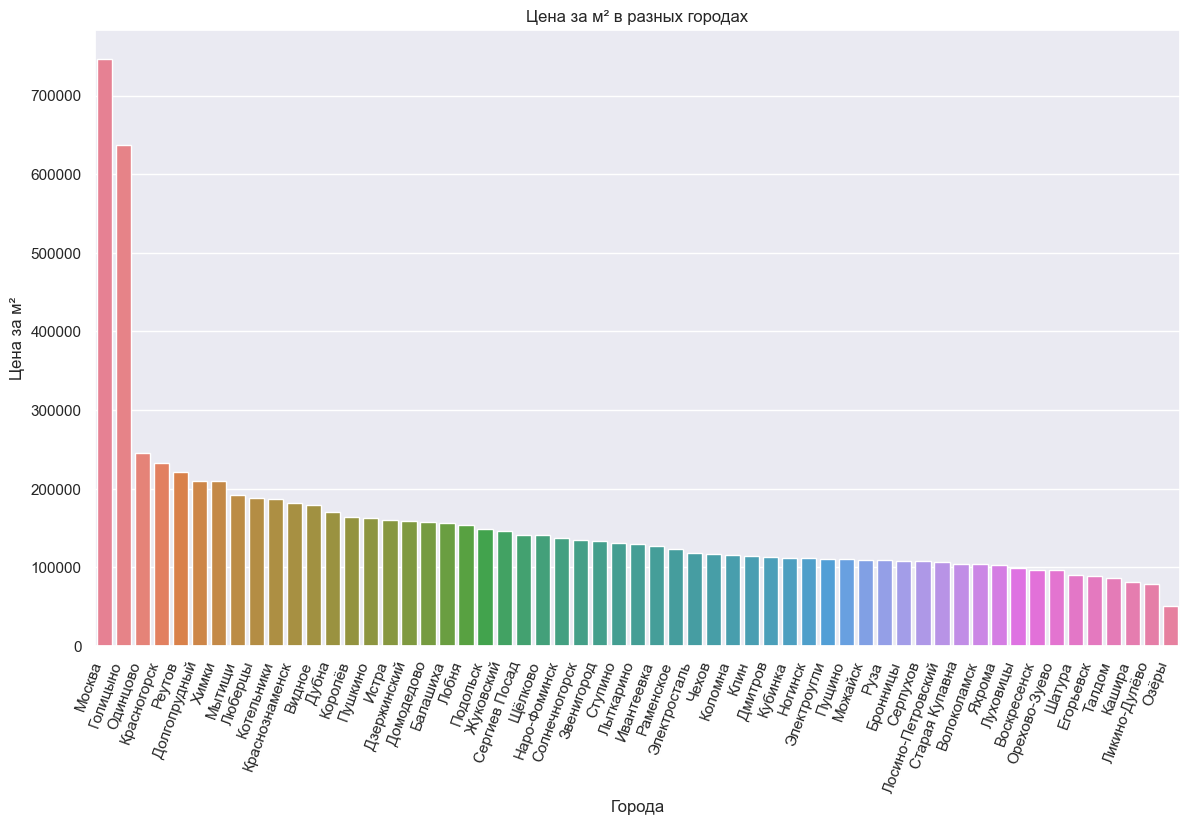

In [37]:
sns.set(style='darkgrid')
plt.figure(figsize=(14, 8))
sns.barplot(hue='city', legend=False, x='city', y='price_for_meter', data=info_sorted)
plt.title('Цена за м² в разных городах')
plt.xlabel('Города')
plt.ylabel('Цена за м²')
plt.xticks(rotation=70, ha='right')
plt.show()